# Analysis of Chicago's Uber trip data

## Introduction

The city of Chicago provides data on individual Uber trips, registered vehicles and Uber drivers since 2018.

### Import neccessary packages

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
%matplotlib inline

### Import the data

To save time let us read 1 million rows only, but in the future I will work on the entire dataset.

In [3]:
trip_df = pd.read_csv('dataset/Transportation_Network_Providers_-_Trips.csv', nrows=1000000)

In [4]:
trip_df.head(5)

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,022ad3b7f1320d4e52cce3d5931eb0a0cee16c48,11/01/2018 08:45:00 AM,11/01/2018 09:30:00 AM,"3,140",38.541928,NaN,1.703198e+10,NaN,56.0,47.5,...,9.1,66.6,False,1,NaN,NaN,NaN,41.785999,-87.750934,POINT (-87.7509342894 41.785998518)
1,0377167460a4d5d5e015c642b460e56ac88dab71,11/01/2018 02:00:00 AM,11/01/2018 02:15:00 AM,"1,031",5.321918,NaN,NaN,70.0,NaN,10.0,...,2.5,12.5,False,1,41.745758,-87.708366,POINT (-87.7083657043 41.7457577128),NaN,NaN,NaN
2,03a2ac30a46af881e6a2e6af06a3a779b67c0802,11/01/2018 08:15:00 PM,11/01/2018 09:15:00 PM,"4,125",49.870653,1.703108e+10,NaN,8.0,NaN,62.5,...,3.8,66.3,False,1,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),NaN,NaN,NaN
3,03fe17b0509941aa04744e9e4478ed5ded56b2eb,11/01/2018 03:45:00 AM,11/01/2018 04:15:00 AM,"1,229",11.662228,1.703183e+10,NaN,22.0,NaN,7.5,...,2.5,10.0,True,3,41.916005,-87.675095,POINT (-87.6750951155 41.9160052737),NaN,NaN,NaN
4,040590c0bf5b22f8ccf7d8f19873c612bebfd480,11/01/2018 05:00:00 PM,11/01/2018 06:00:00 PM,"3,383",12.272990,NaN,1.703184e+10,NaN,32.0,27.5,...,2.5,30.0,False,1,NaN,NaN,NaN,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [5]:
trip_df.shape

(1000000, 21)

In [6]:
trip_df.dtypes

Trip ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                   object
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tip                             int64
Additional Charges            float64
Trip Total                    float64
Shared Trip Authorized           bool
Trips Pooled                    int64
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid Location      object
dtype: object

### Remove some features

We then remove features that are redundant or not relevant to the analysis, such as Census Tract and Community area and centroid location.

In [7]:
col_names = list(trip_df.columns)
trip_sub_df = trip_df.drop(columns=col_names[5:9]+[col_names[17], col_names[20]])
trip_sub_df.dtypes

Trip ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                   object
Trip Miles                    float64
Fare                          float64
Tip                             int64
Additional Charges            float64
Trip Total                    float64
Shared Trip Authorized           bool
Trips Pooled                    int64
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
dtype: object

### Remove missing values

Since it is unreasonable to fill missing values for time and geo locations, we are going to drop any row that contains missing values. However, missing values in the lat-lon indicate trips either starting or ending outside the city's area and if we are interested to analyze that we can keep them.

In [8]:
trip_sub_df.dropna(inplace=True)
trip_sub_df.shape

(843414, 15)

### Convert to datetime units

In [14]:
trip_time = trip_sub_df.iloc[:,1]
trip_sub_df.iloc[:,1] = pd.to_datetime(trip_time, format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
trip_time = trip_sub_df.iloc[:,2]
trip_sub_df.iloc[:,2] = pd.to_datetime(trip_time, format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
trip_sub_df.dtypes

Trip ID                               object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                          object
Trip Miles                           float64
Fare                                 float64
Tip                                    int64
Additional Charges                   float64
Trip Total                           float64
Shared Trip Authorized                  bool
Trips Pooled                           int64
Pickup Centroid Latitude             float64
Pickup Centroid Longitude            float64
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
dtype: object

In [15]:
trip_sub_df.iloc[1:5,[1,2]]

,Trip Start Timestamp,Trip End Timestamp
553,2018-11-01 19:15:00,2018-11-01 19:30:00
554,2018-11-01 11:45:00,2018-11-01 12:00:00
767,2018-11-01 12:45:00,2018-11-01 13:15:00
772,2018-11-01 09:30:00,2018-11-01 10:00:00


## Exploratory Data Analysis

### Histogram plots

First, let us see how the distribution of the trip duration and trip length(miles) looks like.

**Histogram for trip duation**

In [32]:
def histplot (x):
    fig, ax=plt.subplots(1)
    fig.set_size_inches(20,10)
    plt.hist(x, bins=20)

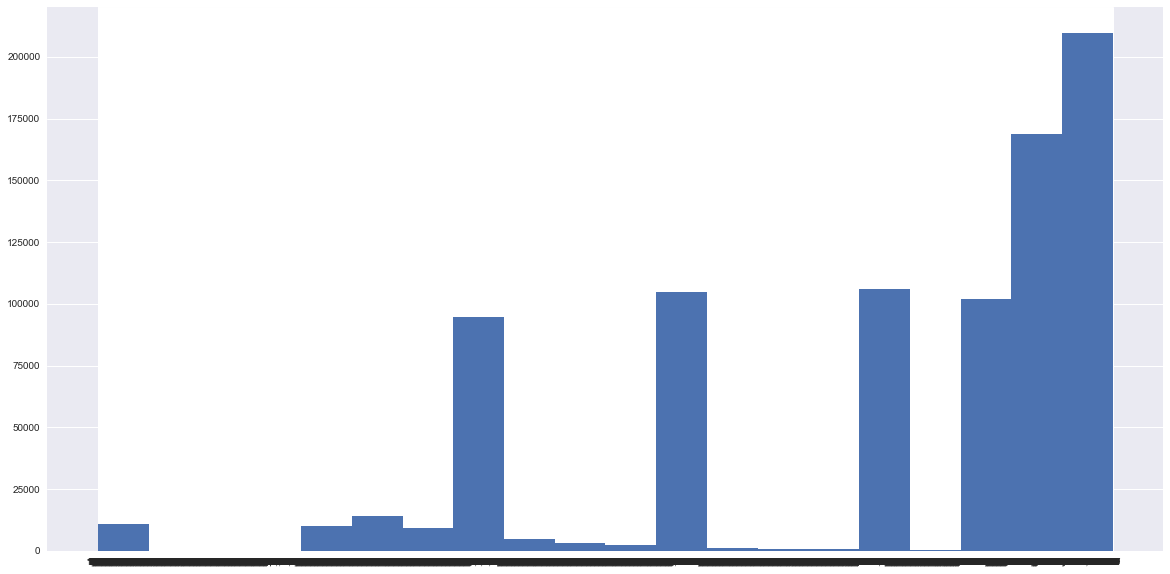

In [33]:
histplot(trip_sub_df['Trip Seconds'])

**Histogram for trip length**

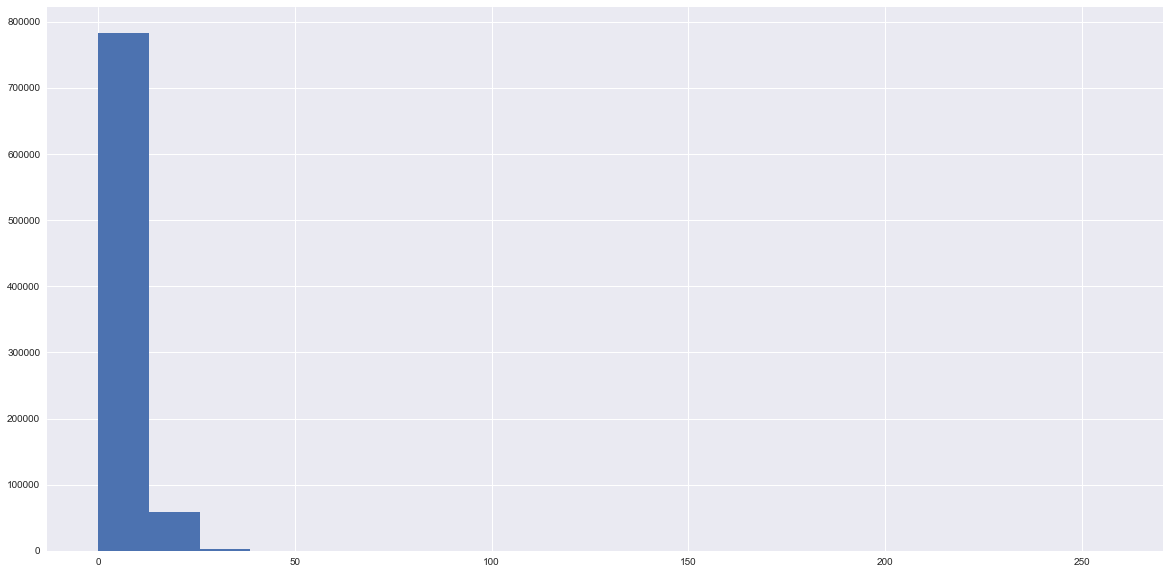

In [34]:
histplot(trip_sub_df['Trip Miles'])

**Histogram plot  for trip's total charge**

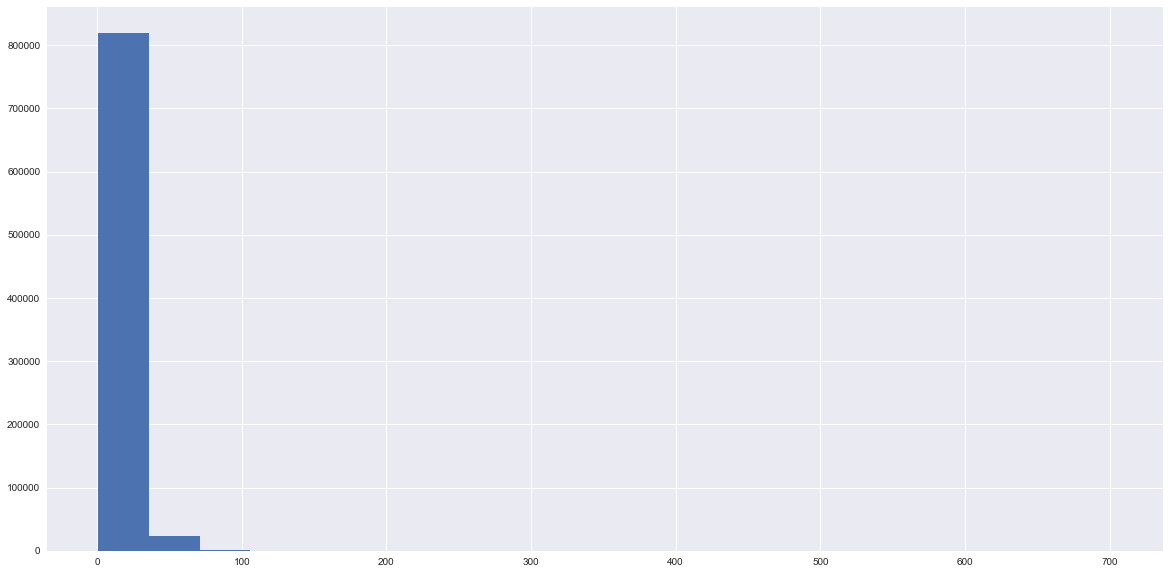

In [35]:
histplot(trip_sub_df['Trip Total'])

Let us generate pairplot for selected variable using seaborn package.

ValueError: color kwarg must have one color per dataset

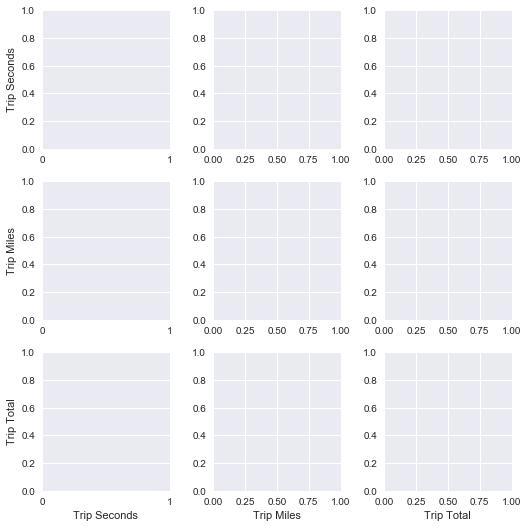

In [31]:
import seaborn as sns
#sns.set(color_codes=True)
sns.set_palette("Set2")
sns.set(rc={'figure.figsize':(16,16)})
sns.pairplot(trip_sub_df, vars=['Trip Seconds', 'Trip Miles', 'Trip Total'])

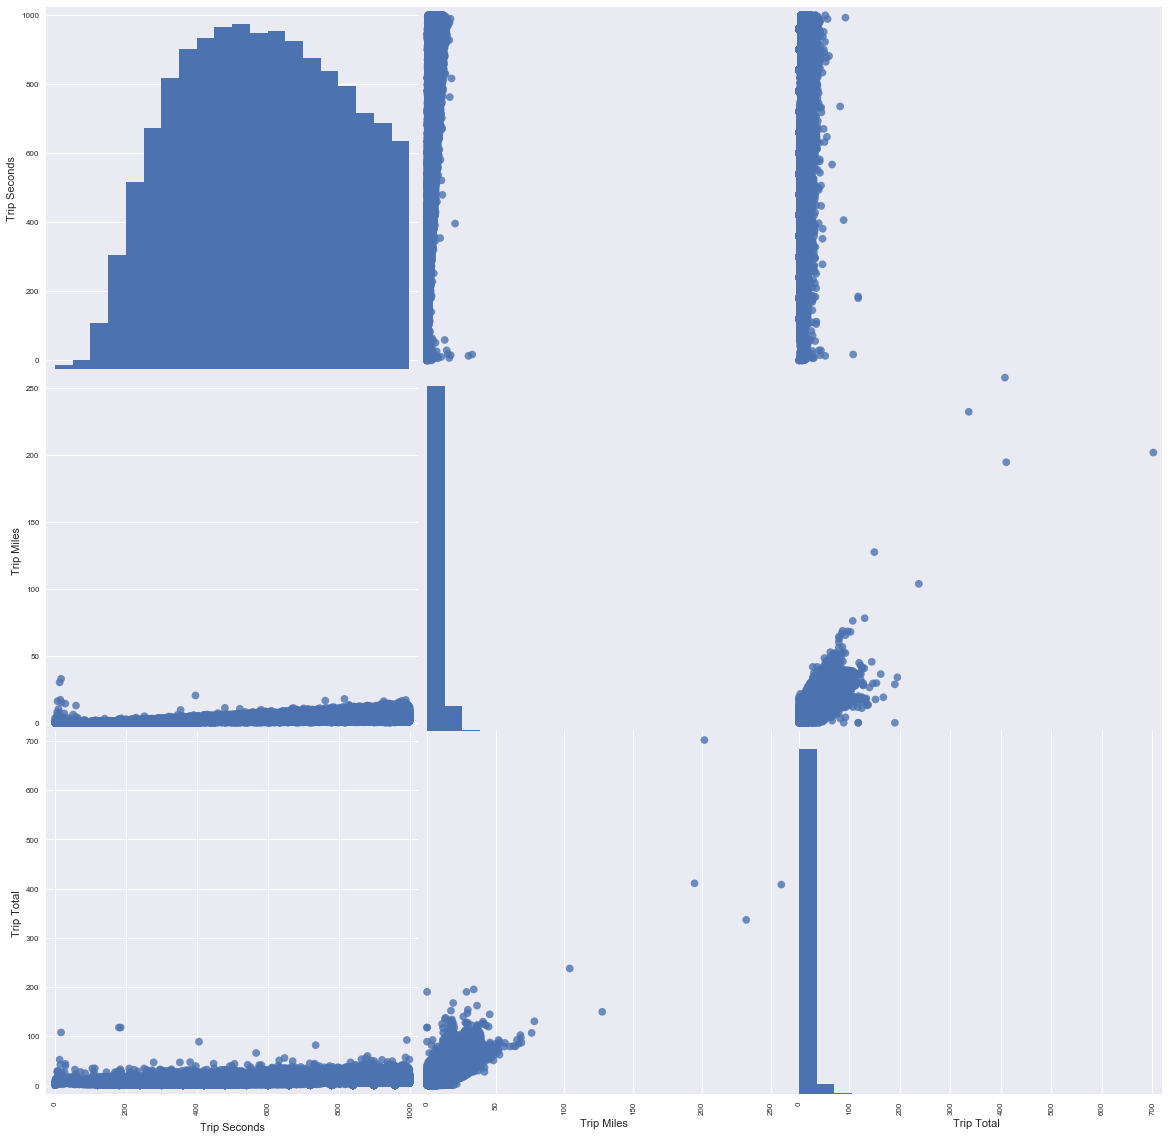

In [56]:
matrix=pd.plotting.scatter_matrix(trip_sub_df[['Trip Seconds', 'Trip Miles', 'Trip Total']], figsize=(20, 20), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)

### Scatter plots

Let us see if there is any relationship between trip's total charge and trip miles and trip duration using scatter plots

In [51]:
def scatter (x,y):
    fig, ax=plt.subplots(1)
    fig.set_size_inches(20,10)
    plt.scatter(x,y)

**Scatter plot for trip duration vs trip total charge**

In [47]:
tm = trip_sub_df['Trip Seconds']
trip_sub_df['Trip Seconds'] = pd.to_numeric(tm, errors='coerce')

In [61]:
# Check for na values
sum(trip_sub_df['Trip Seconds'].isna())

300209

In [62]:
trip_sub_df.dropna(inplace=True)
trip_sub_df.shape

(543205, 15)

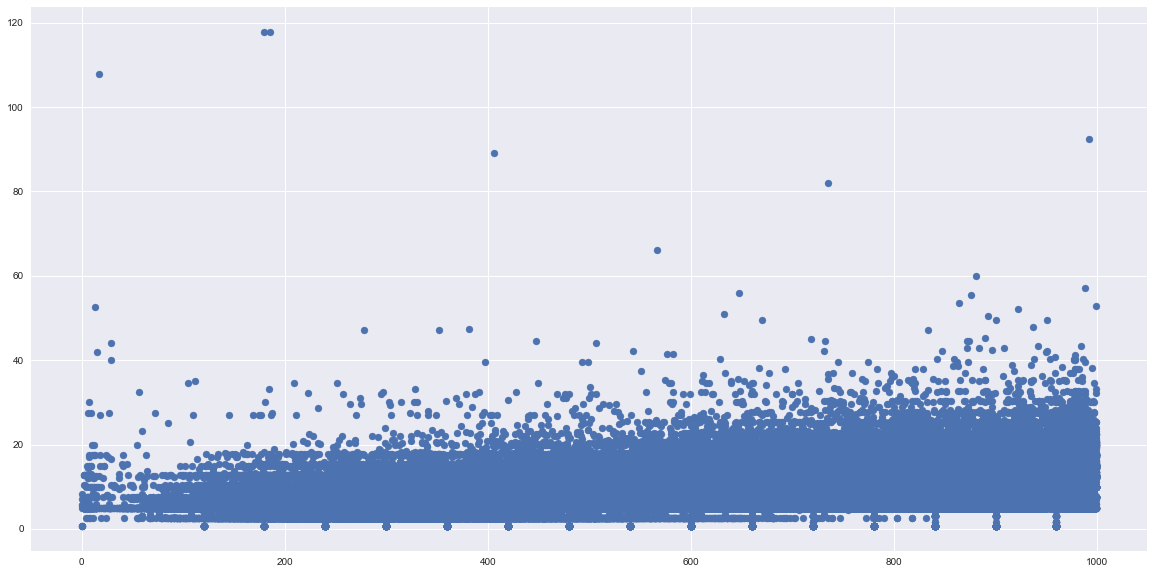

In [52]:
scatter(trip_sub_df['Trip Seconds'],trip_sub_df['Trip Total'])

## Can we predict trip's total charge?

We can expect the total trip charge to depend on several factors including duration of the trip, trip mile, time of the  data, traffic condition, etc. Here I will start builing a machine learning model using multiple linear regression. For now I will focus only on the trip's duration and miles. Later on I will add other parameters. 

We start with first splitting the data into training and testing sets.

**Split data into training and testing**

In [63]:
from sklearn.model_selection import train_test_split

X = trip_sub_df[['Trip Seconds', 'Trip Miles']]
y = trip_sub_df['Trip Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

**Fit the model**

In [64]:
X.describe()

,Trip Seconds,Trip Miles
count,543205.000000,543205.000000
mean,581.230725,2.406742
std,225.942054,1.628304
min,0.000000,0.000000
25%,400.000000,1.222590
50%,579.000000,1.962473
75%,766.000000,3.143331
max,999.000000,32.849356


In [65]:
y.describe()

count    543205.000000
mean          9.088494
std           3.353325
min           0.670000
25%           7.500000
50%           8.500000
75%          10.000000
max         117.800000
Name: Trip Total, dtype: float64

In [66]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [67]:
# Get the training score
score = reg.score(X_train, y_train)
print(f'Model training score = {score}')

# Get model coefficients
coef = reg.coef_
print(f'Model coefficients = {coef}')

inter = reg.intercept_ 
print(f'Model intercepts = {inter}')

Model training score = 0.37784816740753846
Model coefficients = [0.00370819 0.85771547]
Model intercepts = 4.870513008819532


In [68]:
# Get the test score
score = reg.score(X_test, y_test)
print(f'Model test score = {score}')

Model test score = 0.3791032052665169
